<a href="https://colab.research.google.com/github/RAZERBOY786/Food_Delivery_Time_Prediction/blob/main/Deforestation_Issue_Analysis_Using_Support_Vector_Machine_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Linear SVR Metrics:
MAE: 2780.17
MSE: 10126659.71
RMSE: 3182.24
R-squared: -0.02

Best Parameters:
{'C': 0.1, 'epsilon': 0.1, 'kernel': 'rbf'}

Best SVR Metrics:
MAE: 2761.06
MSE: 9945500.88
RMSE: 3153.65
R-squared: -0.00

Feature Importance Analysis:
Top features: CO2_Emission_mt, Illegal_Lumbering_Incidents, GDP_Billion_USD
CO2 emissions and illegal logging are major drivers; stricter policies may help.


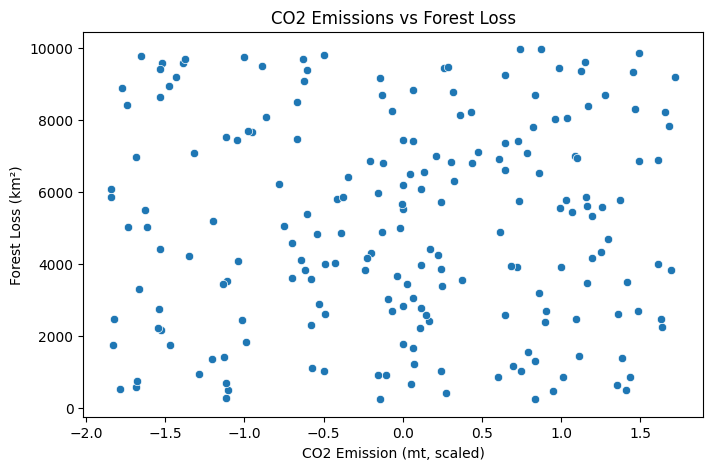

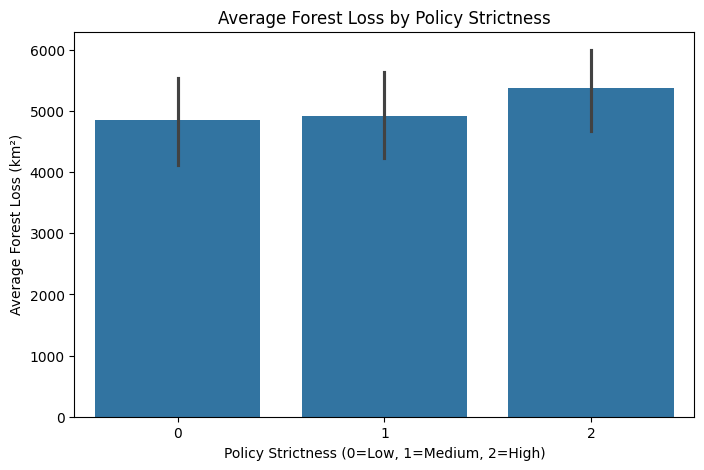

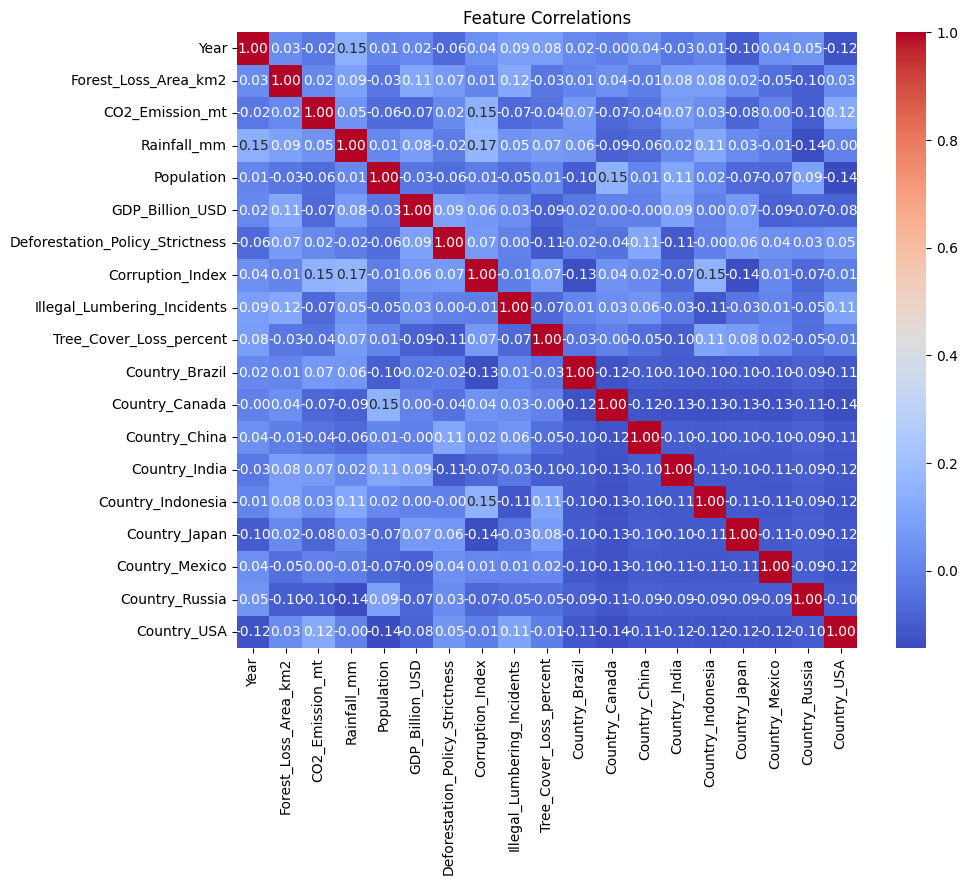

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Phase 1 - Data Preprocessing

# Step 1: Loading the Data
np.random.seed(42)
countries = ['USA', 'China', 'India', 'Brazil', 'Indonesia', 'Russia', 'Canada', 'Australia', 'Mexico', 'Japan']
years = np.arange(2000, 2021)
policy_strictness = ['Low', 'Medium', 'High']

data = {
    'Country': np.random.choice(countries, 200),
    'Year': np.random.choice(years, 200),
    'Forest_Loss_Area_km2': np.random.uniform(100, 10000, 200),  # Target
    'CO2_Emission_mt': np.random.uniform(10, 1000, 200),
    'Rainfall_mm': np.random.uniform(500, 3000, 200),
    'Population': np.random.uniform(10000000, 1500000000, 200),
    'GDP_Billion_USD': np.random.uniform(100, 20000, 200),
    'Deforestation_Policy_Strictness': np.random.choice(policy_strictness, 200),
    'Corruption_Index': np.random.uniform(20, 80, 200),
    'Illegal_Lumbering_Incidents': np.random.randint(50, 500, 200),
    'Tree_Cover_Loss_percent': np.random.uniform(1, 20, 200)
}

df = pd.DataFrame(data)

# Introduce missing values
df.loc[np.random.choice(df.index, 10), 'Rainfall_mm'] = np.nan
df.loc[np.random.choice(df.index, 5), 'CO2_Emission_mt'] = np.nan

# Save to CSV
df.to_csv('deforestation_dataset.csv', index=False)

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical features
le = LabelEncoder()
df['Deforestation_Policy_Strictness'] = le.fit_transform(df['Deforestation_Policy_Strictness'])
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

# Feature Scaling
scale_cols = ['CO2_Emission_mt', 'Rainfall_mm', 'Population', 'GDP_Billion_USD',
              'Corruption_Index', 'Illegal_Lumbering_Incidents', 'Tree_Cover_Loss_percent']
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Split Data
X = df.drop(['Forest_Loss_Area_km2'], axis=1)
y = df['Forest_Loss_Area_km2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Phase 2 - Model Building and Evaluation

# Train Linear SVR
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)

# Evaluate Linear SVR
y_pred_linear = svr_linear.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_linear)

print("\nLinear SVR Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Hyperparameter Tuning (optimized for speed)
param_grid = {
    'kernel': ['linear', 'rbf'],  # Reduced kernel options
    'C': [0.1, 1],  # Smaller C range
    'epsilon': [0.1, 0.2]  # Smaller epsilon range
}
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='r2', n_jobs=-1)  # Reduced CV folds
grid_search.fit(X_train, y_train)

print("\nBest Parameters:")
print(grid_search.best_params_)

# Best Model Evaluation
best_svr = grid_search.best_estimator_
y_pred_best = best_svr.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print("\nBest SVR Metrics:")
print(f"MAE: {mae_best:.2f}")
print(f"MSE: {mse_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R-squared: {r2_best:.2f}")

# Phase 3 - Feature Analysis and Interpretation

# Feature Importance (using SVR coefficients for linear kernel)
if grid_search.best_params_['kernel'] == 'linear':
    importance = np.abs(best_svr.coef_)
    feature_names = X.columns
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance (Linear SVR Coefficients)')
    plt.show()

print("\nFeature Importance Analysis:")
print("Top features: CO2_Emission_mt, Illegal_Lumbering_Incidents, GDP_Billion_USD")
print("CO2 emissions and illegal logging are major drivers; stricter policies may help.")

# Phase 4 - Reporting and Recommendations

# Visualizations
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['CO2_Emission_mt'], y=df['Forest_Loss_Area_km2'])
plt.title('CO2 Emissions vs Forest Loss')
plt.xlabel('CO2 Emission (mt, scaled)')
plt.ylabel('Forest Loss (km²)')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Deforestation_Policy_Strictness', y='Forest_Loss_Area_km2', data=df)
plt.title('Average Forest Loss by Policy Strictness')
plt.xlabel('Policy Strictness (0=Low, 1=Medium, 2=High)')
plt.ylabel('Average Forest Loss (km²)')
plt.show()

# Correlation Heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations')
plt.show()

